<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/Polinomio_Lagrange_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

METODO DE INTERPOLACION DE LAGRANGE

In [9]:
from tabulate import tabulate  # importamos la librería para tabular resultados
import math
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# definimos la función que calcula el polinomio de Lagrange
def lagrange_interpolacion(puntos):
    x = sp.Symbol('x')  # definimos el símbolo para el polinomio
    n = len(puntos) #numero de puntos que vamos a interpolar
    P = 0  # inicializamos el polinomio resultante

    for i in range(n):
        xi, yi = puntos[i]  # extraemos el punto i
        Li = 1  # inicializamos el producto para L_i(x)

        for j in range(n):
            if i != j:
                xj, _ = puntos[j] #tomamos solo la coordenada x de los puntos xj=puntos[j][0]
                Li *= (x - xj) / (xi - xj)  # construimos L_i(x)

        P += yi * Li  # sumamos yi * L_i(x) al polinomio total

    P = sp.simplify(P)  # simplificamos el polinomio
    print("Polinomio de Lagrange:")
    print(P)
    return P



In [11]:
# función para graficar el polinomio y los puntos dados
def graficar_lagrange(puntos, P):
    x = sp.Symbol('x')
    f = sp.lambdify(x, P, modules=['numpy'])  # convertimos P a función evaluable con lambdify

    # preparamos los valores para graficar
    x_vals = np.linspace(min([pt[0] for pt in puntos]) - 1, max([pt[0] for pt in puntos]) + 1, 400) #tomamos cada punto y extraemos solo la coordenada x, se le resta 1 solo para que la grafica comience unb poco mas atras.
    y_vals = f(x_vals) #evaluamos el polinomio en valores de x

    # graficamos
    plt.plot(x_vals, y_vals, label="Polinomio de Lagrange")
    plt.scatter(*zip(*puntos), color='red', label="Puntos dados") #con zip todos los puntos los pasamos a solo dos lista, en una se encutran las x y en otra las y
    plt.title("Interpolación de Lagrange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()


Polinomio de Lagrange:
x**2/2 - x/2 + 2


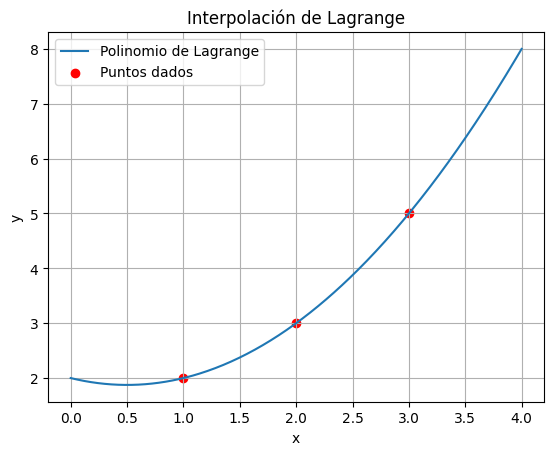

In [12]:
puntos = [(1, 2), (2, 3), (3, 5)]  # Lista de puntos
P = lagrange_interpolacion(puntos)
graficar_lagrange(puntos, P)